We use regression when we want to investigate the correllation between one variable (dependent) and one or more other variables (independent)


Terms: 

ednogenous (endog) for the dependent variable

exogenous (exog) for the independent variable

We want to investigate if the dependent variables is affected by the independent variables ; 

In a simpler problem we have 2 variables (1 dependent,1 independent) and are correllated by a linear regression

In the case of linear regression we start with a hypothesis indecated by

y=α+βx+ϵ

Practically we have a sum of observations (yi,xi) and we want to estimate α & β

We will start with a historic example were we will investigate regression

Example:

Francis Galton 1886 = study of the height of children based on the height of their parents

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats

sns.set_theme()

In [2]:
galton_families = sm.datasets.get_rdataset("GaltonFamilies", package="HistData")

galton_families.data

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


In [3]:
fathers_sons = galton_families.data[galton_families.data['gender'] == 'male']
fathers_sons

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
4,002,75.5,66.5,73.66,4,1,male,73.5
5,002,75.5,66.5,73.66,4,2,male,72.5
8,003,75.0,64.0,72.06,2,1,male,71.0
10,004,75.0,64.0,72.06,5,1,male,70.5
...,...,...,...,...,...,...,...,...
918,199,64.0,64.0,66.56,7,2,male,68.0
924,200,64.0,63.0,66.02,1,1,male,64.5
925,201,64.0,60.0,64.40,2,1,male,66.0
929,203,62.0,66.0,66.64,3,1,male,64.0


In [4]:
pearsonr = stats.pearsonr(x=fathers_sons['father'], y=fathers_sons['childHeight'])
pearsonr

(0.39238349666283556, 3.7371088561934017e-19)

The easiest way to work with regression in Python is by using what we call (formulas) like we use in R

We declare a model based on a mathematical equation

Then we use this model on our data -- fit()

By using (params) on the results , the output is an intercept and a slope based on the regression

In [5]:
fathers_sons_mod = smf.ols("childHeight ~ father", data=fathers_sons) # ~ means with respect
fathers_sons_res = fathers_sons_mod.fit()
fathers_sons_res.params

Intercept    38.362581
father        0.446523
dtype: float64

Hence by using the mathematical equation we declared beforehand
[variable:childHeight(y) ; father(x)

y=38,362581+0,446523x


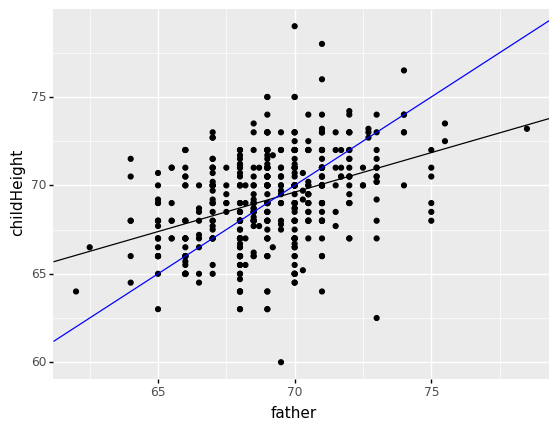

<ggplot: (128209123892)>

In [6]:
# Design a plot

ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_abline(intercept=fathers_sons_res.params['Intercept'], 
                slope=fathers_sons_res.params['father']) +\
    geom_abline(intercept=0, slope=1, color='blue') # diagonal line

The diagonal(blue line) it stepper than the regression(black line)

This is because the childern height increases compared to the father height but not for much

From the diagram, we can observe that:

1) On the right hand side of the graph , most of the observations are below the diagonal.
Meaning that taller father tend to have kids shorter than them

2) On the left hand side of the graph , ost of the observations are above the diagonal.
Meaning that shorter father tend to have kids taller than them

This is want Galdon figure out ==> called regression to the mean

Hence from the outlier observations we can say that we tend to regression to the mean ( average values )

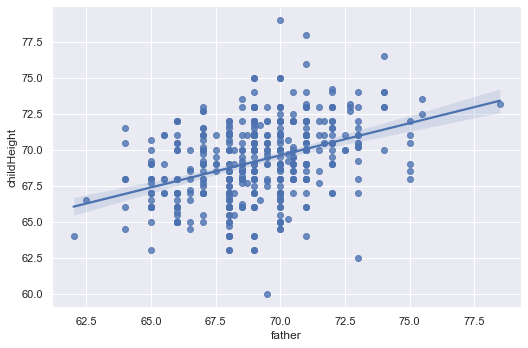

In [7]:
# Using seaborn
sns.lmplot(x='father', y='childHeight', data=fathers_sons, aspect=1.5)

The shaded area around the regression line indicates a 95% degrees of success?

This means that everytime we redo the experiment , the regressions line will be confined between the shaded area

It might me useful if we design a diagram with the obesrvations of the model.

Meaning taking the point of regression where the independent variables are

Need to use fittedvalues


In [8]:
fathers_sons_res.fittedvalues

0      73.414606
4      72.075038
5      72.075038
8      71.851776
10     71.851776
         ...    
918    66.940028
924    66.940028
925    66.940028
929    66.046983
932    66.270244
Length: 481, dtype: float64

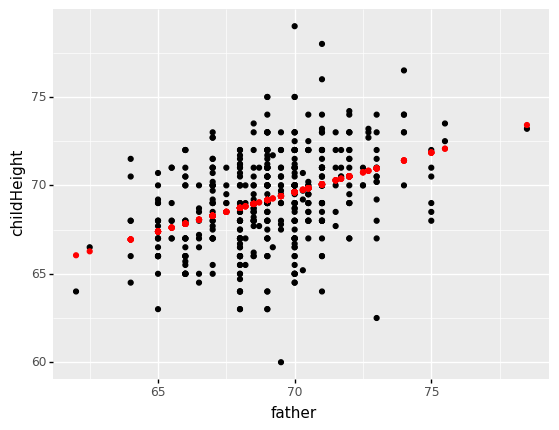

<ggplot: (128209771108)>

In [ ]:
ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_point(mapping=aes(x='father', y=fathers_sons_res.fittedvalues), color='red')

Hence we can see that connecting the red sports we get the regression line

In [10]:
# Summary
fathers_sons_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     87.17
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           3.74e-19
Time:                        18:59:37   Log-Likelihood:                -1105.8
No. Observations:                 481   AIC:                             2216.
Df Residuals:                     479   BIC:                             2224.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.3626      3.308     11.596      0.000      31.862      44.863
father         0.4465      0.048      9.337      0.000       0.353       0.540
==============================================================================
Omnibus:                        8.610   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               12.731
Skew:                          -0.110   Prob(JB):                      0.00172
Kurtosis:                       3.766   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that the p-value is 0 meaning that the regression line is not random

In [ ]:
# coefficient of determination(R-squared)
fathers_sons_res.rsquared

0.1539648084533538

R^2 is a metric for goodness of fit ; meaning how well the data match the model

Can take values from 0-1

R^2 = 0 means that the observations are not fit on the regression lines .
We can say that the values can be estimated not more that the mean value

R^2 = 1 means that all the observations are on a straight line

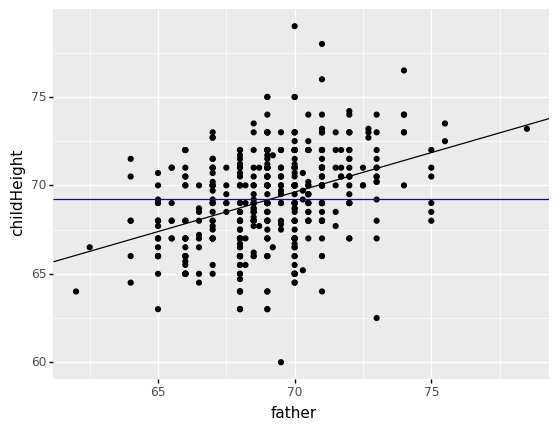

<ggplot: (128209878059)>

In [12]:
# See the difference
ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_abline(intercept=fathers_sons_res.params['Intercept'], 
                slope=fathers_sons_res.params['father']) +\
    geom_abline(intercept=fathers_sons.childHeight.mean(), slope=0, color='blue')

Blue line indicates R^2 =0

In [13]:
# R^2=r^2 (goodness of fit coeff squared  = spearman coeff sqaured)
print(fathers_sons_res.rsquared, pearsonr[0]**2)
np.isclose(fathers_sons_res.rsquared, pearsonr[0]**2)

0.1539648084533538 0.15396480845335347


True

This does not always happens in general 
Can happen when there is linear regression

We have found a value that R^2 = 0.154 meaning that there is a 15.4% variation of the height of child and the height of father explaines where as there is appr 85 % of such correlation not explained

Higher prcentage of R the higher the goodness of fit on the regression line

The difference between the dependent variable and the observed variable is called residual

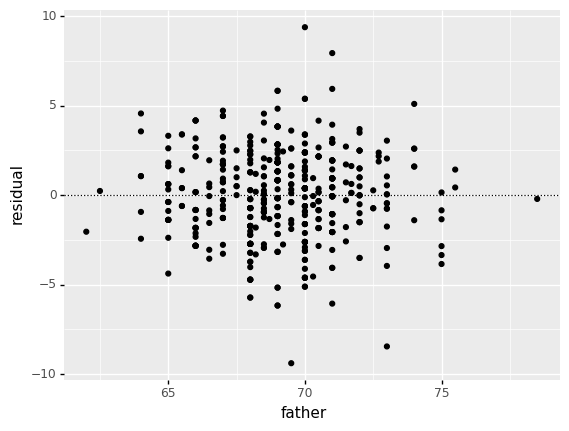

<ggplot: (128209918811)>

In [14]:
# Residual line
ggplot(data=fathers_sons) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x=fathers_sons['father'], y=fathers_sons_res.resid)) +\
    ylab('residual')

We called the above result from the data (homoscedastic) do not depend on the independent variable

Whereas the opposite are called heteroscedastic ==> no pattern

If the diagram shows and assumption bit the data are heteroscedastic then we can conclude that the linear regression model does not explain the output

<AxesSubplot:xlabel='father', ylabel='childHeight'>

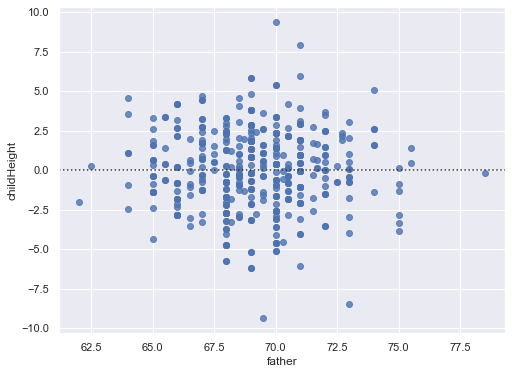

In [17]:
# Seaborn alternative (residplot)
plt.figure(figsize=(8, 6))
sns.residplot(x='father', y='childHeight', data=fathers_sons)

Another graphical tool we can use is the QQ (quantile-quantile plot)

This diagram allows us to create a model of for the residuals

If the residulas follow the regression then straight diagonal line

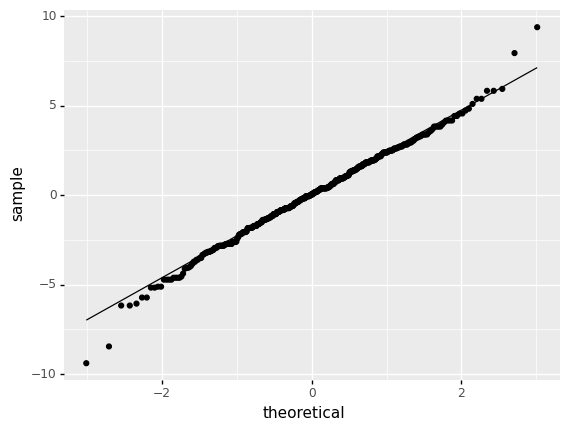

<ggplot: (128209983139)>

In [18]:
ggplot(data=fathers_sons_res.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
    geom_qq_line(mapping=aes(sample='resid'))

Majority of data are on a straight line

Note:

Residuals are also the key on understanding how regression works.

Regression creates a line using the based on ordinary least squares.

Tries to minimize the distance of the values squared

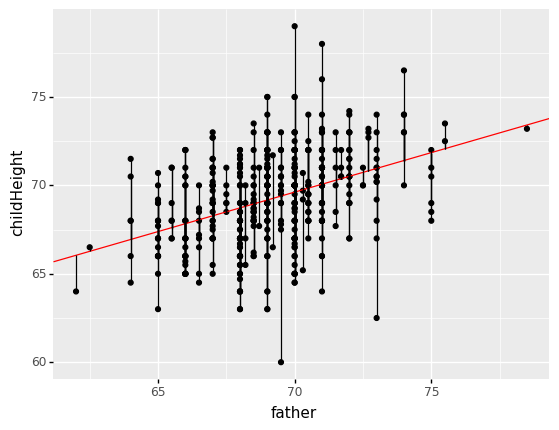

<ggplot: (128210067836)>

In [19]:
# data , regression line,residuals
ggplot(data=fathers_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_abline(intercept=fathers_sons_res.params['Intercept'], 
                slope=fathers_sons_res.params['father'], color='red') +\
    geom_linerange(mapping=aes(x='father', 
                               ymin=fathers_sons_res.fittedvalues, 
                               ymax='childHeight'))

In [20]:
# Lets see another example
cd = pd.read_csv('correlation_regression.csv')
print(cd.shape)
cd.iloc[[0, -1]]

(21, 3)


,year,c,d
0,1999,7.588764,330
20,2019,8.587049,1070


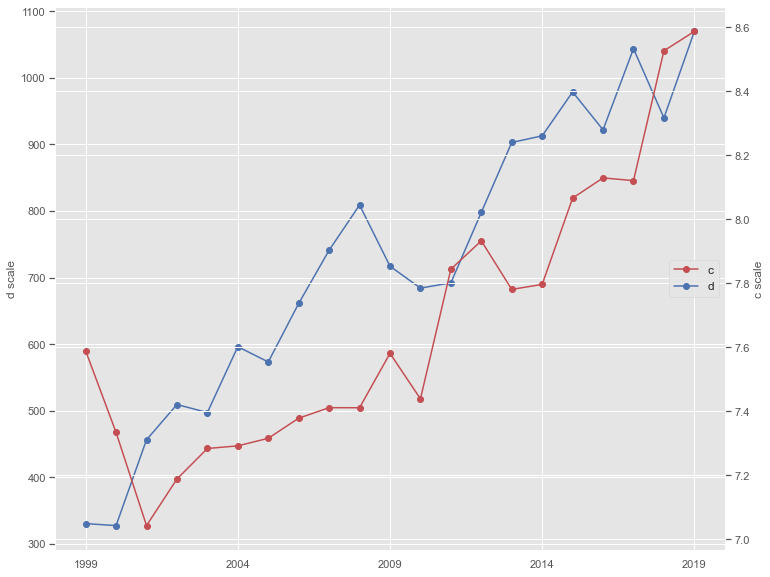

In [31]:
# Desiging graph
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=(12, 10))
d_line, = ax1.plot(cd.year, cd.d, 'bo-', label='d')
ax1.set_ylabel('d scale')

ax2 = ax1.twinx()
c_line, = ax2.plot(cd.year, cd.c, 'ro-', label='c')
ax2.set_ylabel('c scale')

plt.xticks(np.arange(cd.year.min(), cd.year.max()+1, step=5))
plt.legend(handles=[c_line, d_line], loc='right', fontsize=12)

In [25]:
#Pearson coefficient
stats.pearsonr(cd.c, cd.d)

(0.7980824438518808, 1.457161889155522e-05)

In [26]:
cd_mod = smf.ols("d ~ c", data=cd)
cd_res = cd_mod.fit()
cd_res.params

Intercept   -2423.778839
c             410.191120
dtype: float64

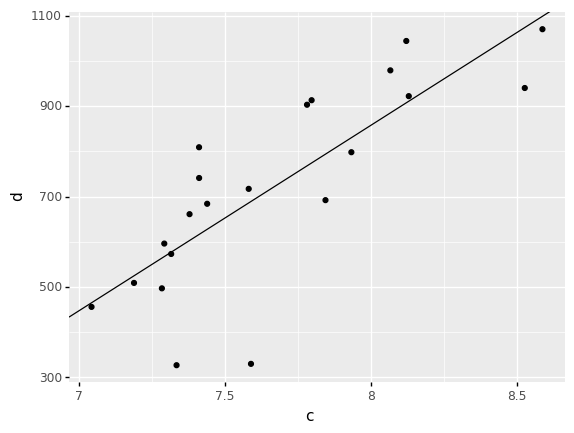

<ggplot: (128209995749)>

In [27]:
ggplot(data=cd) +\
    geom_point(mapping=aes(x='c', y='d')) +\
    geom_abline(intercept=cd_res.params['Intercept'], 
                slope=cd_res.params['c'])

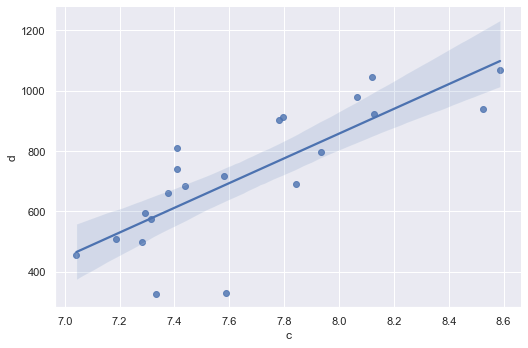

In [28]:
# seaborn
sns.lmplot(x='c', y='d', data=cd, aspect=1.5)

In [29]:
cd_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     33.33
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           1.46e-05
Time:                        19:28:02   Log-Likelihood:                -132.06
No. Observations:                  21   AIC:                             268.1
Df Residuals:                      19   BIC:                             270.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2423.7788    545.684     -4.442      0.000   -3565.909   -1281.649
c            410.1911     71.048      5.773      0.000     261.485     558.897
==============================================================================
Omnibus:                        7.240   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.796
Skew:                          -1.057   Prob(JB):                       0.0909
Kurtosis:                       4.007   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# R squared
cd_res.rsquared

0.6369355871845904

60% of the data fit the regression line


Now what does c actually mean

c: corresponds to the head consumption of cheese in the USA between 1999-2019

d: corresponds to the deaths USA caused by struggling in bed or suffocation

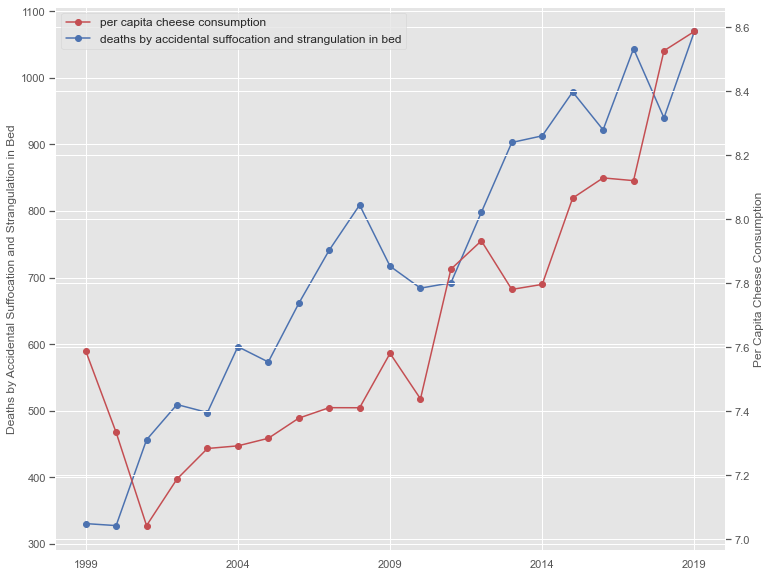

In [32]:
# Re-creating the graph with the correct labels
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=(12, 10))
d_line, = ax1.plot(cd.year, cd.d, 'bo-', label='deaths by accidental suffocation and strangulation in bed')
ax1.set_ylabel('Deaths by Accidental Suffocation and Strangulation in Bed')

ax2 = ax1.twinx()
c_line, = ax2.plot(cd.year, cd.c, 'ro-', label='per capita cheese consumption')
ax2.set_ylabel('Per Capita Cheese Consumption')

plt.xticks(np.arange(cd.year.min(), cd.year.max()+1, step=5))
plt.legend(handles=[c_line, d_line], loc='upper left', fontsize=12)

Can these be actually realated?

* Very important: 

correlation does not imply causation

Can find more information:

https://www.tylervigen.com/spurious-correlations

Book:

"The Art of Statistics: Learning from Data" ; David Spiegelhater, Pelican, 2019.